# Installing Dependencies

In [4]:
!pip install gower

In [5]:
import numpy as np
import pandas as pd
import gower
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

# Preprocessing

In [7]:
# Load data from csv file

df = pd.read_csv('L1_TESTS_FINAL_SUBMISSION.csv')

In [11]:
# Data analysis

unique_values = df.apply(lambda x: x.unique())
print(unique_values)

Unnamed: 0             [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Mode                                               [OFFBOARD, AUTO.LAND]
MSN State              [Flying, Land, Disarm, Takeoff, Arm, Hover, Re...
Wind                                                      [nan, 5 North]
GF                                                             [Yes, No]
GFPRED                                                    [No, Yes, nan]
GFACT                  [Return mode, Hold mode, Warning, Land mode, nan]
kill_switch                                                    [No, Yes]
mode_switch            [POSCTL, STABILIZED, OFFBOARD, ALTCTL, AUTO.LO...
throttle               [0.0, 225.0, -100.0, 260.0, 600.0, 100.0, 550....
max_deviation          [14.73085616, 14.76118354, 0.16044742, 14.7897...
max_altitude           [8.43568, 8.218861, 12.619712, 8.455968, 16.14...
duration               [0:00:35, 0:01:27, 0:01:16, 0:01:45, 0:01:17, ...
final_landing_state                                

### Data Cleaning

In [14]:
df['throttle'].unique()

array([   0.,  225., -100.,  260.,  600.,  100.,  550.,  445.,  435.,
        450.,  615.,  570.,  300.,   nan])

In [16]:
df.fillna(value='None', inplace=True)

/tmp/ipykernel_1147075/1573829081.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna(value='None', inplace=True)


In [18]:
df['Wind'] = df['Wind'].apply(lambda x: 1 if x is not None else 0)

In [20]:
df['duration'] = pd.to_timedelta(df['duration']).dt.total_seconds()

In [22]:
df

,Unnamed: 0,Mode,MSN State,Wind,GF,GFPRED,GFACT,kill_switch,mode_switch,throttle,max_deviation,max_altitude,duration,final_landing_state,freefall_occurred,mission_complete
0,0,OFFBOARD,Flying,1,Yes,No,Return mode,No,POSCTL,0.0,14.730856,8.435680,35.0,True,False,False
1,1,OFFBOARD,Flying,1,Yes,No,Hold mode,No,STABILIZED,225.0,14.761184,8.218861,87.0,True,False,False
2,2,OFFBOARD,Flying,1,Yes,No,Return mode,No,OFFBOARD,-100.0,0.160447,12.619712,76.0,True,False,True
3,3,OFFBOARD,Flying,1,Yes,No,Return mode,No,ALTCTL,260.0,14.789770,8.455968,87.0,True,False,False
4,4,OFFBOARD,Flying,1,Yes,No,Hold mode,No,ALTCTL,600.0,14.925705,16.143398,105.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,700,OFFBOARD,Takeoff,1,No,None,None,Yes,ALTCTL,None,34.769376,0.045367,88.0,True,False,False
701,701,OFFBOARD,Hover,1,No,None,None,Yes,STABILIZED,None,14.765467,12.156211,85.0,True,True,False
702,702,AUTO.LAND,Arm,1,No,None,None,Yes,AUTO.LAND,None,34.462637,0.040255,89.0,True,False,False
703,703,OFFBOARD,Takeoff,1,No,None,None,Yes,AUTO.LOITER,None,34.834306,0.012228,88.0,True,False,False


# Clustering with Gower Similarity Metrics and Clustering

## Similarity Matrix

In [26]:
# Compute the Gower distance matrix
gower_dist = gower.gower_matrix(df)


## K-Means Clustering

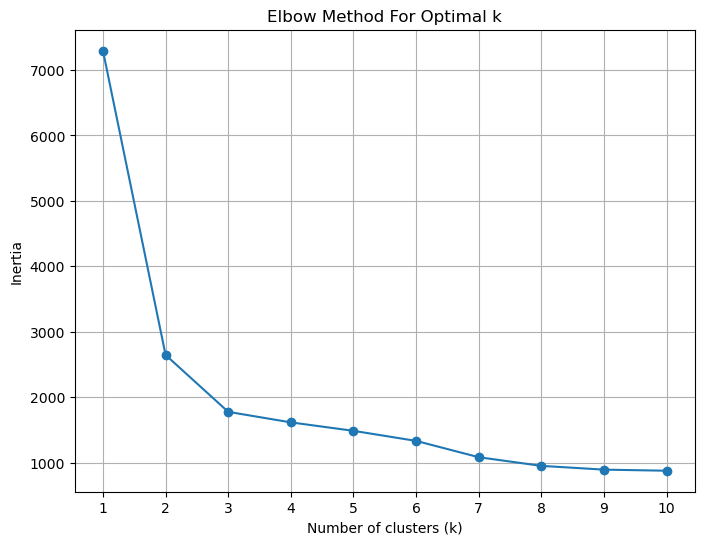

In [29]:
#Elbow Approach

# Function to calculate KMeans inertia on the Gower distance matrix
def calculate_inertia(dist_matrix, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(dist_matrix)
        inertias.append(kmeans.inertia_)
    return inertias

# Determine the optimal number of clusters using the elbow method
max_k = 10
inertias = calculate_inertia(gower_dist, max_k)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

In [31]:
#Applying the optimal k value to perform k-means clustering

# Compute the Gower distance matrix
gower_dist = gower.gower_matrix(df)

# Perform KMeans clustering
# Number of clusters (k) - choose appropriate value
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model on the Gower distance matrix
kmeans.fit(gower_dist)

# Get cluster labels
labels = kmeans.labels_


df_with_clusters = df.copy()
df_with_clusters['cluster'] = labels


df_with_clusters


,Unnamed: 0,Mode,MSN State,Wind,GF,GFPRED,GFACT,kill_switch,mode_switch,throttle,max_deviation,max_altitude,duration,final_landing_state,freefall_occurred,mission_complete,cluster
0,0,OFFBOARD,Flying,1,Yes,No,Return mode,No,POSCTL,0.0,14.730856,8.435680,35.0,True,False,False,2
1,1,OFFBOARD,Flying,1,Yes,No,Hold mode,No,STABILIZED,225.0,14.761184,8.218861,87.0,True,False,False,2
2,2,OFFBOARD,Flying,1,Yes,No,Return mode,No,OFFBOARD,-100.0,0.160447,12.619712,76.0,True,False,True,2
3,3,OFFBOARD,Flying,1,Yes,No,Return mode,No,ALTCTL,260.0,14.789770,8.455968,87.0,True,False,False,2
4,4,OFFBOARD,Flying,1,Yes,No,Hold mode,No,ALTCTL,600.0,14.925705,16.143398,105.0,True,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,700,OFFBOARD,Takeoff,1,No,None,None,Yes,ALTCTL,None,34.769376,0.045367,88.0,True,False,False,0
701,701,OFFBOARD,Hover,1,No,None,None,Yes,STABILIZED,None,14.765467,12.156211,85.0,True,True,False,0
702,702,AUTO.LAND,Arm,1,No,None,None,Yes,AUTO.LAND,None,34.462637,0.040255,89.0,True,False,False,1
703,703,OFFBOARD,Takeoff,1,No,None,None,Yes,AUTO.LOITER,None,34.834306,0.012228,88.0,True,False,False,0


In [33]:
df_with_clusters['cluster'].unique()

array([2, 1, 0], dtype=int32)

## Evaluation

In [36]:
# Calculate silhouette score to evaluate the clustering performance
sil_score = silhouette_score(gower_dist, labels, metric='precomputed')

print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.34432992339134216


In [38]:
# Calculate centroid coordinates
centroids = kmeans.cluster_centers_

# Initialize a list to store closest points to centroids
closest_points_to_centroids = []

# Find closest points to each centroid
for i, centroid in enumerate(centroids):
    # Calculate distances from each point to the centroid
    distances_to_centroid = gower_dist[:, i]
    # Find the index of the closest point
    closest_index = np.argmin(distances_to_centroid)
    # Get the point and its distance
    closest_point = df.iloc[closest_index]
    distance_to_centroid = distances_to_centroid[closest_index]
    # Append to list
    closest_points_to_centroids.append(closest_point)

# Convert the list of dictionaries to a DataFrame
closest_points_to_centroids_df = pd.DataFrame(closest_points_to_centroids)
closest_points_to_centroids_df

,Unnamed: 0,Mode,MSN State,Wind,GF,GFPRED,GFACT,kill_switch,mode_switch,throttle,max_deviation,max_altitude,duration,final_landing_state,freefall_occurred,mission_complete
0,0,OFFBOARD,Flying,1,Yes,No,Return mode,No,POSCTL,0.0,14.730856,8.435680,35.0,True,False,False
1,1,OFFBOARD,Flying,1,Yes,No,Hold mode,No,STABILIZED,225.0,14.761184,8.218861,87.0,True,False,False
2,2,OFFBOARD,Flying,1,Yes,No,Return mode,No,OFFBOARD,-100.0,0.160447,12.619712,76.0,True,False,True


## Visualization

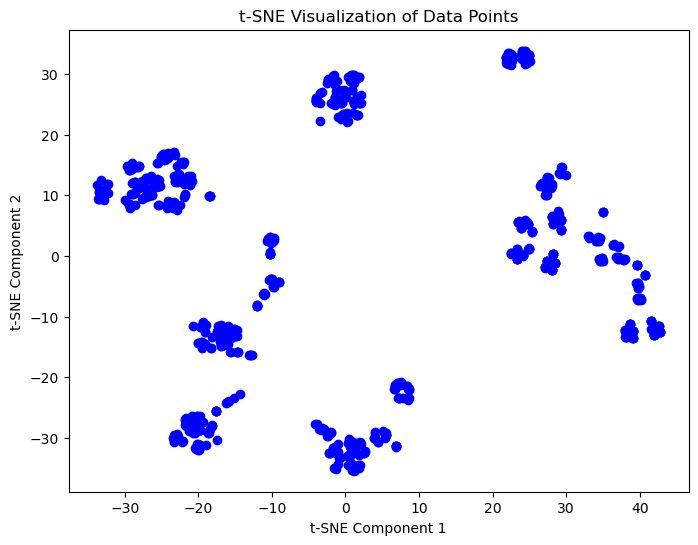

In [41]:
# Vizualization with Gower

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(gower_dist)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='blue')
plt.title('t-SNE Visualization of Data Points')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

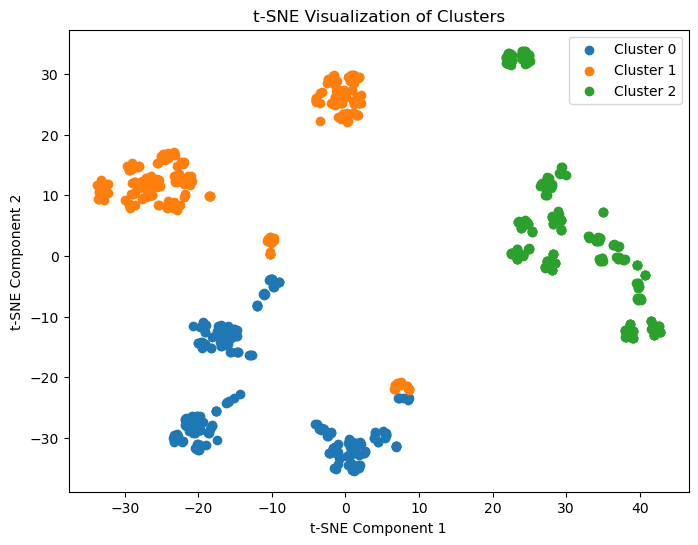

In [42]:
# Visualization with Grower and KMeans clustering

# Compute the Gower distance matrix
gower_dist = gower.gower_matrix(df)

# Perform KMeans clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(gower_dist)

# Get cluster labels
labels = kmeans.labels_

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(gower_dist)

# Visualize clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_tsne[labels == i, 0], X_tsne[labels == i, 1], label=f'Cluster {i}')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()
